In [1]:
# It is recommended to use a Python environment version 3.10 or higher
!python --version

Python 3.11.0


In [2]:
%matplotlib inline

In [3]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import trange
import random

# Set a fixed random seed for reproducibility
seed = 144
random.seed(seed)
np.random.seed(seed)


## Logistic Regression Model

`LogisticRegressionTrainer` class:  
`gradient_descent_step()`: Updates parameters without returning any values.  
`cross_entropy_loss()`: Also uses the regularization term

In [4]:
class LogisticRegressionTrainer:
    def __init__(
        self,
        num_features: int,
        learning_rate: float = 1e-2,
        num_epochs: int = 500,
        lambd: float = 0.0,
    ) -> None:
        """Constructor for logistic regression trainer."""
        self.lambd = lambd
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = num_features
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        self.test_loss = None
        self.test_acc = None

        # Please initialize the model's weights. Any initialization strategy is acceptable.
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        self.theta = np.zeros(num_features)
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def gradient_descent_step(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Execute one iteration of gradient descent.

        Args:
            x: Feature matrix.
            y: Label vector.
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        self.theta -= self.learning_rate * self.cross_entropy_loss_derivative(x, y)
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Transform logits into probabilities.

        Args:
            z: Logits.

        Returns:
            Probabilities as a vector (or scalar if the input is scalar).
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        return 1 / (1 + np.power(np.e, -z))
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def cross_entropy_loss(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Compute binary cross-entropy loss, including regularization.

        Args:
            pred: Predictions (as probabilities).
            target: Actual labels.

        Returns:
            Loss as a scalar value.
        """
        assert pred.shape == target.shape
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        # y_hat = np.array([1 if i >= 0.5 else 0 for i in pred])
        pred = np.clip(pred, 1e-15, 1 - 1e-15)
        loss = np.sum(-(target * np.log(pred) + (1 - target) * np.log(1 - pred))) / len(target)
        regularization = self.lambd * np.sum(np.square(self.theta)) / (len(target) * 2)
        # print(target)
        return loss + regularization
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def cross_entropy_loss_derivative(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Compute gradient of loss function with respect to theta, including L2 regularization.

        Args:
            x: Feature vectors.
            y: True labels.

        Returns:
            Gradient vector, parallel to theta.
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        predicted = self.sigmoid(np.matmul(x, self.theta))
        loss_d = np.matmul((predicted - y), x)
        reg_d = self.lambd * np.sum(np.square(self.theta)) / len(y)
        return loss_d + reg_d
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

# Logistic Regression on Breast Cancer Binary Classification
Data from Kaggle
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

array([[<AxesSubplot: title={'center': 'radius_mean'}>,
        <AxesSubplot: title={'center': 'texture_mean'}>,
        <AxesSubplot: title={'center': 'perimeter_mean'}>,
        <AxesSubplot: title={'center': 'area_mean'}>,
        <AxesSubplot: title={'center': 'smoothness_mean'}>],
       [<AxesSubplot: title={'center': 'compactness_mean'}>,
        <AxesSubplot: title={'center': 'concavity_mean'}>,
        <AxesSubplot: title={'center': 'concave points_mean'}>,
        <AxesSubplot: title={'center': 'symmetry_mean'}>,
        <AxesSubplot: title={'center': 'fractal_dimension_mean'}>],
       [<AxesSubplot: title={'center': 'radius_se'}>,
        <AxesSubplot: title={'center': 'texture_se'}>,
        <AxesSubplot: title={'center': 'perimeter_se'}>,
        <AxesSubplot: title={'center': 'area_se'}>,
        <AxesSubplot: title={'center': 'smoothness_se'}>],
       [<AxesSubplot: title={'center': 'compactness_se'}>,
        <AxesSubplot: title={'center': 'concavity_se'}>,
        <A

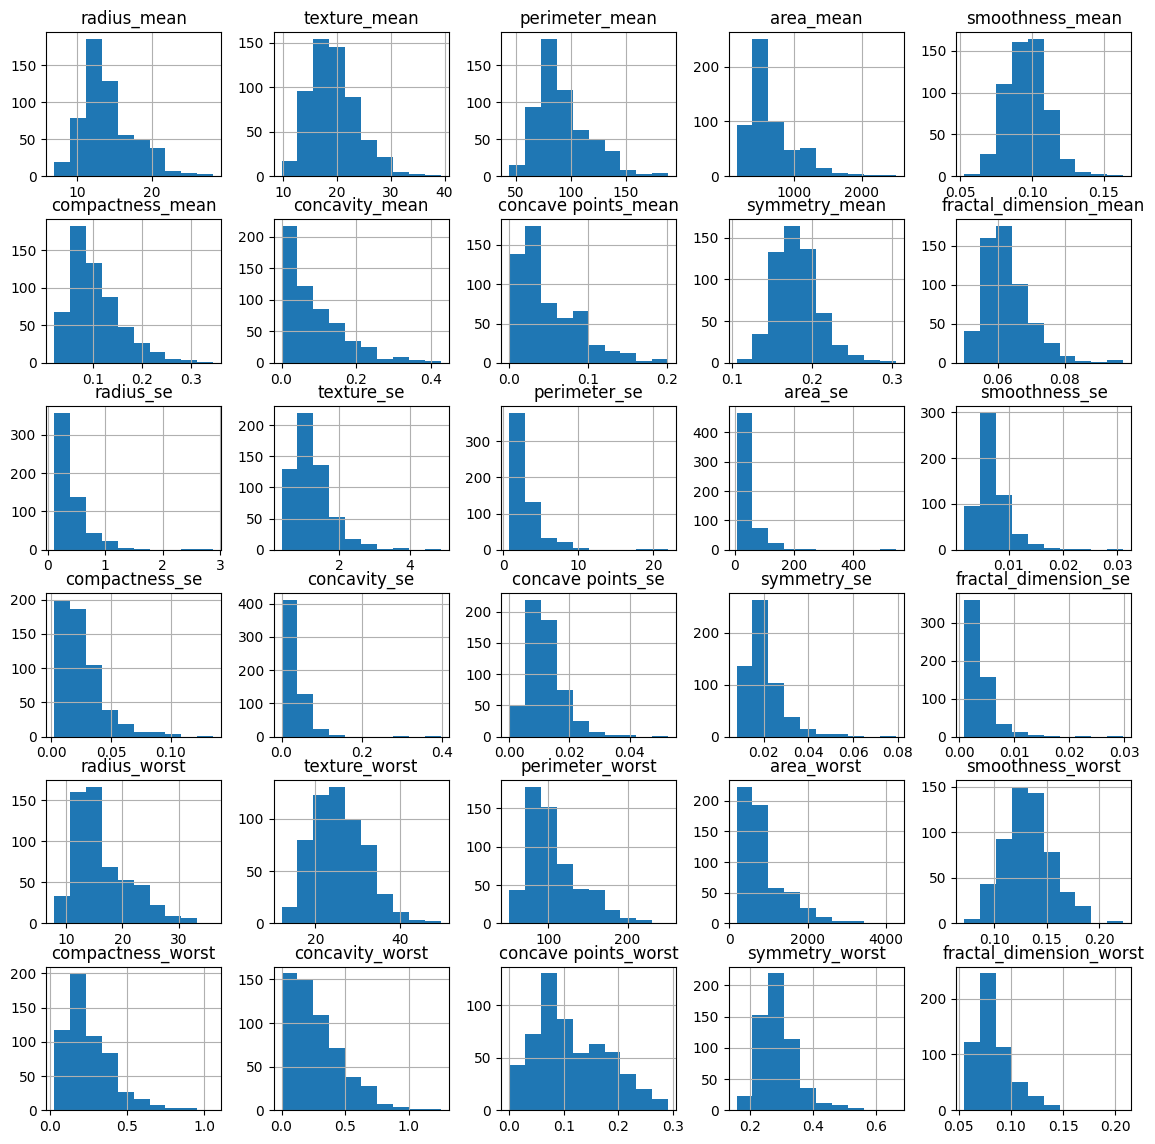

In [5]:
breast_data = pd.read_csv('./breast-cancer.csv', index_col=0)
# Data Overview
breast_data.info()
breast_data.hist(figsize=(14, 14))

In [6]:
print(f'Total: {breast_data.shape[0]}')
m, b = breast_data.loc[breast_data['diagnosis'] == 'M'], breast_data.loc[breast_data['diagnosis'] == 'B']
print(f'Number of Malignant: {m.shape[0]}')
print(f'Number of Benign: {b.shape[0]}')



Total: 569
Number of Malignant: 212
Number of Benign: 357


In [7]:
# Eliminate empty rows
breast_data = breast_data.dropna(axis=0)

breast_data_y_cols = 'diagnosis'
breast_data_x_cols = breast_data.loc[ : , breast_data.columns != breast_data_y_cols].columns

# Remove outliers further than 1.5 * IQR in certain features
# for feature in ['radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se', 'fractal_dimension_se']:
#     q1, q3 = breast_data[feature].quantile(0.25), breast_data[feature].quantile(0.75)
#     iqr = q3 - q1
#     drop_indices = breast_data[(breast_data[feature] > (q3 + 1.5 * iqr)) | (breast_data[feature] < (q1 - 1.5 * iqr))].index 
#     breast_data = breast_data.drop(index=drop_indices)

# breast_data = breast_data.reset_index(drop=True)

# scale x
for feature in breast_data_x_cols:
    feature_mean, feature_std = breast_data[feature].mean(), breast_data[feature].std()
    breast_data[feature] = breast_data[feature].apply(lambda n: (n - feature_mean) / feature_std)

# Let M=1, B=0
print(f'Total: {breast_data.shape[0]}')
m, b = breast_data.loc[breast_data['diagnosis'] == 'M'], breast_data.loc[breast_data['diagnosis'] == 'B']
print(f'Number of Malignant: {m.shape[0]}')
print(f'Number of Benign: {b.shape[0]}')

breast_data[breast_data_y_cols] = breast_data[breast_data_y_cols].apply(lambda s: 1 if s.lower()=='m' else 0)
breast_data

Total: 569
Number of Malignant: 212
Number of Benign: 357


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
842517,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
84300903,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
84348301,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
84358402,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
926682,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
926954,1,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129


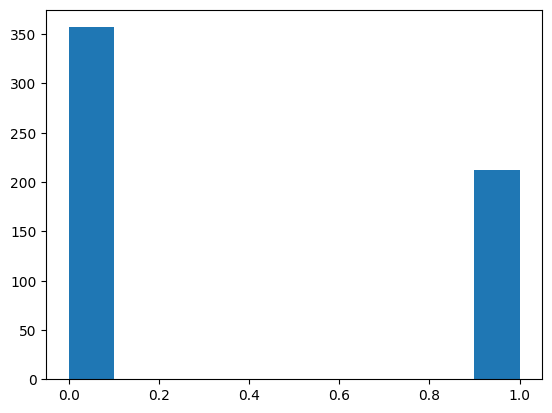

In [8]:
# Plot y
plt.hist(breast_data[breast_data_y_cols])
plt.show()

In [9]:
# Split for Train and Test Data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(breast_data[breast_data_x_cols], breast_data[breast_data_y_cols], test_size=0.3, random_state=seed)

# Split for Train and Validation Data
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.3, random_state=seed)

# Convert to numpy array
X_train_b, X_val_b, y_train_b, y_val_b = X_train_b.to_numpy(), X_val_b.to_numpy(), y_train_b.to_numpy(), y_val_b.to_numpy()

Epoch: 100%|██████████| 500/500 [00:00<00:00, 13035.10it/s]

Final training loss for the best model: 0.07762529269185978
Final validation loss for the best model: 0.7796996027102112
Best model parameters: [ -7.07190688  -1.14204526  -3.80443823  -3.65911986  -1.9483457
   2.32509528   9.90054493   0.93753152  -0.27871389  -2.26143828
  -0.92410148  -7.51916563   9.41538565   1.8194207    2.26530329
   0.45834145  -1.25125337   8.70467914  -6.4381738  -12.25215989
   9.33849689   9.69181599   9.86660509   8.03420113   1.6172953
 -12.15740087   4.54073663  -4.66575372   5.42723366  11.49869126]


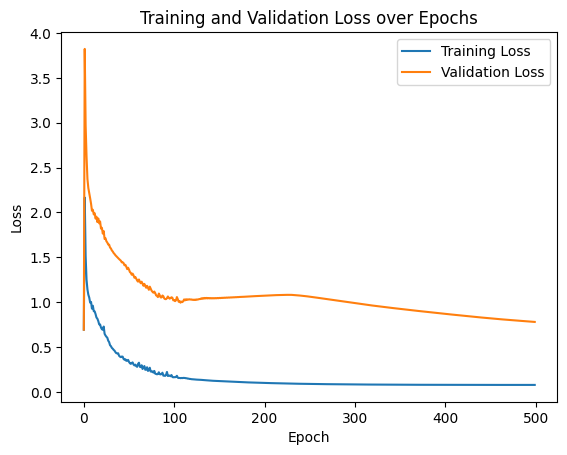

In [10]:
# Train model
num_epochs = 500
learning_rate = 0.3
lambd = 0.03

model = LogisticRegressionTrainer(num_features=X_train_b.shape[1], learning_rate=learning_rate, num_epochs=num_epochs, lambd=lambd)

for epoch in trange(num_epochs, desc='Epoch'):
    # Calculate loss and update loss histories
    # print(model.theta)
    train_pred = model.sigmoid(np.matmul(X_train_b, model.theta))
    train_loss = model.cross_entropy_loss(train_pred, y_train_b)
    model.train_loss_history.append(train_loss)
    
    val_pred = model.sigmoid(np.matmul(X_val_b, model.theta))
    val_loss = model.cross_entropy_loss(val_pred, y_val_b)
    model.val_loss_history.append(val_loss)

    # Parameter update
    model.gradient_descent_step(X_train_b, y_train_b)

print(f"Final training loss for the best model: {model.train_loss_history[-1]}")
print(f"Final validation loss for the best model: {model.val_loss_history[-1]}")
print("Best model parameters:", model.theta)

plt.plot(np.arange(num_epochs), model.train_loss_history, label="Training Loss")
plt.plot(np.arange(num_epochs), model.val_loss_history, label="Validation Loss")
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [11]:

pred = model.sigmoid(np.matmul(X_test_b.to_numpy(), model.theta))
y_hat = np.array([1 if i >= 0.5 else 0 for i in pred])
y = y_test_b.to_numpy()
tp, tn, fp, fn = 0, 0, 0, 0
for i in range(len(y)):
    if y[i] == 1 and y_hat[i] == 1:
        tp += 1
    elif y[i] == 0 and y_hat[i] == 0:
        tn += 1
    elif y[i] == 0 and y_hat[i] == 1:
        fp += 1
    elif y[i] == 1 and y_hat[i] == 0:
        fn += 1
print(f'Test loss: {model.cross_entropy_loss(pred, y_test_b)}')
print(f'Model coorectly predicted {tp + tn} out of {len(y)} ({(tp + tn) / len(y) * 100:.2f}%).')
print(f'TP: {tp}')
print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')

Test loss: 0.44241469767427943
Model coorectly predicted 164 out of 171 (95.91%).
TP: 58
TN: 106
FP: 5
FN: 2
